# Part 0: Startup

In [139]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
import pytz

In [140]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [141]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [142]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [143]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


# Part I Total Reward Sum by Daily

In [144]:
# Read in Transaction Data
data = pd.read_csv('total_reward_sum_by_daily.csv')
data.head()

,index,date,final_total_reward,proposer_total_reward,attestation_total_reward,sync_total_reward
0,0,2022-09-25,1652994601503,209590556968,1393048628639,50355415896
1,1,2022-09-26,638075450347,80995188394,537767595493,19312666460
2,2,2022-09-24,1377922465159,174899023997,1161060553430,41962887732
3,0,2022-09-28,1005933333486,127716941220,847724799828,30491592438
4,1,2022-09-27,1641227520467,209010389691,1383511377578,48705753198


In [145]:
data.sort_values(by='date',inplace=True) # Why there are multiple values for a date?
data

,index,date,final_total_reward,proposer_total_reward,attestation_total_reward,sync_total_reward
11,2,2022-09-15,1142336453893,147823762714,960736468121,33776223058
9,0,2022-09-16,1590103889535,205197949000,1336935154055,47970786480
42,0,2022-09-17,809615334428,103797777537,681078391553,24739165338
10,1,2022-09-17,800361045100,102656336130,673349001506,24355707464
43,1,2022-09-18,1620454747426,207083260113,1363916989995,49454497318
...,...,...,...,...,...,...
69,2,2022-11-11,1696649180703,215724191596,1430295755875,50629233232
70,3,2022-11-12,90738861695,11535736086,76432505377,2770620232
76,2,2022-11-12,1611508928152,204668378779,1358493603833,48346945540
74,0,2022-11-13,1703125000909,216414918699,1436018360480,50691721730


In [146]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = data.copy()

# Create subplots in a 2x2 layout
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=("Time Series", "Distribution", "Boxplot", "Statistics"),
                    specs=[[{}, {}], [{}, {"type": "domain"}]])

# Add time series to the top-left subplot
fig.add_trace(go.Scatter(x=df['date'], y=df['final_total_reward'], mode='lines', name='Time Series'),
              row=1, col=1)

# Add histogram to the top-right subplot
fig.add_trace(go.Histogram(x=df['final_total_reward'], name='Distribution'),
              row=1, col=2)

# Add boxplot to the bottom-left subplot
fig.add_trace(go.Box(y=df['final_total_reward'], name='Boxplot', boxmean=True),
              row=2, col=1)

# Extract specific statistics from the data: mean, median (50%), and std
selected_stats = {
    'mean': df['final_total_reward'].mean(),
    'median': df['final_total_reward'].median(),
    'std': df['final_total_reward'].std()
}

trace_table = go.Table(
    header=dict(values=['Statistic', 'Value'], font=dict(size=10), align='left'),
    cells=dict(values=[list(selected_stats.keys()), list(selected_stats.values())], font=dict(size=10), align='left')
)

fig.add_trace(trace_table, row=2, col=2)

# Update layout to use LaTeX style font (using "Courier New" as a fallback)
fig.update_layout(
    font=dict(family="Courier New, monospace", size=18, color="black"),
    title_text="Subplots for Daily Total Reward (Gwei)"
)

# Show figure
fig.show()


In [150]:
# Save the figure with high resolution
fig.write_image("total_reward_daily.png",height=900, width=1600, scale=3)  # The scale parameter can be adjusted for desired resolution.

In [52]:
import pandas as pd
import plotly.graph_objects as go

df=data.copy()

# Get columns that end with '_reward'
reward_columns = [col for col in df.columns if col.endswith('_reward') and col != 'final_total_reward']

# Create a Plotly figure
fig = go.Figure()

# Add traces for each reward column
for col in reward_columns:
    fig.add_trace(go.Scatter(x=df['date'], y=df[col], mode='none', stackgroup='one', name=col))

# Update layout for the legend and other properties
fig.update_layout(
    font=dict(family="Courier New, monospace", size=16, color="black"),
    title_text=f"Decomposition of total daily reward (Gwei)",
    showlegend=True,
    legend=dict(
        y=1.05,            # Adjusts the y position
        x=0.5,            # Adjusts the x position
        xanchor='center', # Anchor the x position
        yanchor='top',    # Anchor the y position
        orientation='h'   # Horizontal orientation
    )
)


# Show figure
fig.show()


In [53]:
# Save the figure with high resolution
fig.write_image("reward3_timeseries_daily.png", height=900, width=1600, scale=3)  # The scale parameter can be adjusted for desired resolution.

In [54]:
import pandas as pd
import plotly.graph_objects as go

# Sample data (replace with your data)
df =data.copy()

# Get columns that end with '_reward' but exclude 'final_total_reward'
reward_columns = [col for col in df.columns if col.endswith('_reward') and col != 'final_total_reward']

# Compute total reward for each date excluding 'final_total_reward'
df['total_reward_excluding_final'] = df[reward_columns].sum(axis=1)

# Convert each reward column to a percentage of the total reward excluding 'final_total_reward'
for col in reward_columns:
    df[col] = (df[col] / df['total_reward_excluding_final']) * 100

# Create a Plotly figure
fig = go.Figure()

# Add traces for each reward column in percentage
for col in reward_columns:
    fig.add_trace(go.Scatter(x=df['date'], y=df[col], mode='none', stackgroup='one', groupnorm='percent', name=col))
fig.update_yaxes(title='percentage')
# Update layout for the legend and other properties
fig.update_layout(
    font=dict(family="Courier New, monospace", size=16, color="black"),
    title_text=f"Decomposition of total daily reward (Gwei) in percentage",
    showlegend=True,
    legend=dict(
        y=1.05,            # Adjusts the y position
        x=0.5,            # Adjusts the x position
        xanchor='center', # Anchor the x position
        yanchor='top',    # Anchor the y position
        orientation='h'   # Horizontal orientation
    )
)

# Show figure
fig.show()


In [55]:
# Save the figure with high resolution
fig.write_image("reward3_timeseries_Percentage_daily.png",height=900, width=1600, scale=3)  # The scale parameter can be adjusted for desired resolution.

In [56]:
import pandas as pd
import plotly.graph_objects as go
from scipy import stats

# Sample data (replace with your data)
df = data.copy()

# Filter columns ending with '_reward'
reward_columns = [col for col in df.columns if col.endswith('_reward')]

# Initialize matrices to hold correlation coefficients and p-values
correlation_matrix = df[reward_columns].corr()
p_values = pd.DataFrame(index=reward_columns, columns=reward_columns)

# Compute p-values
for col1 in reward_columns:
    for col2 in reward_columns:
        _, p = stats.pearsonr(df[col1], df[col2])
        p_values.at[col1, col2] = p

# Generate annotations for heatmap
annotations = []
for i, col1 in enumerate(reward_columns):
    for j, col2 in enumerate(reward_columns):
        value = correlation_matrix.at[col1, col2]
        p_value = p_values.at[col1, col2]
        annotations.append({
            'x': col2, 'y': col1, 'xref': 'x1', 'yref': 'y1',
            'text': f"{value:.2f} (p={p_value:.2f})",
            'font': dict(size=9, color='black' if p_value < 0.05 else 'gray'),
            'showarrow': False
        })

# Create the heatmap
fig = go.Figure(go.Heatmap(
    z=correlation_matrix,
    x=reward_columns,
    y=reward_columns,
    colorscale='Blues_r',  # Reversed blue colorscale
    zmin=0,
    zmax=1,
))

# Update the layout for LaTeX-style font and smaller font size and add annotations
fig.update_layout(
    font=dict(family="Courier New, monospace", size=10, color="black"),
    title_text="Correlation Matrix of Reward Columns",
    annotations=annotations
)

# Show figure
fig.show()


In [57]:
# Save the figure with high resolution
fig.write_image("reward4_correlation_daily.png", scale=3)  # The scale parameter can be adjusted for desired resolution.

In [61]:
from plotly.subplots import make_subplots
# List of the four specified columns
columns_to_plot = ['final_total_reward', 'proposer_total_reward', 'attestation_total_reward', 'sync_total_reward']

# Define subplots
rows = len(columns_to_plot)
fig = make_subplots(rows=rows, cols=1)

# Add histograms to each subplot row
for row, column in enumerate(columns_to_plot, start=1):
    fig.add_trace(go.Histogram(x=df[column], name=column, opacity=0.6), row=row, col=1)


# Update layout to use LaTeX style font and move the legend above the figure
fig.update_layout(
    font=dict(family="Courier New, monospace", size=16, color="black"),
    title_text="Distribution of Daily Rewards (Gwei)",
    legend=dict(orientation="h", yanchor="bottom", y=1.05, xanchor="right", x=1)
)
fig.show()

# Part II Total Reward Sum by Epoch

In [63]:
# Read in Transaction Data
data = pd.read_csv('total_reward_sum_by_epoch.csv')
data.head()

,epoch,final_total_reward,proposer_total_reward,attestation_total_reward,sync_total_reward
0,148875,7416773592,935312096,6253070340,228391156
1,148876,7388754435,933339979,6227224298,228190158
2,148877,7269028896,925151176,6131049552,212828168
3,148878,7401799074,934550885,6239862023,227386166
4,148879,7331724225,929659508,6184856893,217207824


In [64]:
data.sort_values(by='epoch',inplace=True) # Why there are multiple values for a date?
data

,epoch,final_total_reward,proposer_total_reward,attestation_total_reward,sync_total_reward
1500,146875,6664685180,603773255,5928303849,132608076
1501,146876,6697655898,887502352,5590433174,219720372
1502,146877,6633328212,889998444,5531653164,211676604
1503,146878,6580768665,883880217,5491629744,205258704
1504,146879,7052886047,912422290,5923282021,217181736
...,...,...,...,...,...
10995,159870,7259940963,946530713,6089171506,224238744
10996,159871,7651556975,966269891,6448158434,237128650
10997,159872,7568103596,960841364,6381997448,225264784
10998,159873,7668641933,967755378,6462449609,238436946


In [65]:
data.dtypes

epoch                       int64
final_total_reward          int64
proposer_total_reward       int64
attestation_total_reward    int64
sync_total_reward           int64
dtype: object

In [66]:
data.columns

Index(['epoch', 'final_total_reward', 'proposer_total_reward',
       'attestation_total_reward', 'sync_total_reward'],
      dtype='object')

In [67]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = data.copy()

# Create subplots in a 2x2 layout
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=("Time Series", "Distribution", "Boxplot", "Statistics"),
                    specs=[[{}, {}], [{}, {"type": "domain"}]])

# Add time series to the top-left subplot
fig.add_trace(go.Scatter(x=df['epoch'], y=df['final_total_reward'], mode='lines', name='Time Series'),
              row=1, col=1)

# Add histogram to the top-right subplot
fig.add_trace(go.Histogram(x=df['final_total_reward'], name='Distribution'),
              row=1, col=2)

# Add boxplot to the bottom-left subplot
fig.add_trace(go.Box(y=df['final_total_reward'], name='Boxplot', boxmean=True),
              row=2, col=1)

# Extract specific statistics from the data: mean, median (50%), and std
selected_stats = {
    'mean': df['final_total_reward'].mean(),
    'median': df['final_total_reward'].median(),
    'std': df['final_total_reward'].std()
}

trace_table = go.Table(
    header=dict(values=['Statistic', 'Value'], font=dict(size=10), align='left'),
    cells=dict(values=[list(selected_stats.keys()), list(selected_stats.values())], font=dict(size=10), align='left')
)

fig.add_trace(trace_table, row=2, col=2)

# Update layout to use LaTeX style font (using "Courier New" as a fallback)
fig.update_layout(
    font=dict(family="Courier New, monospace", size=18, color="black"),
    title_text="Subplots for Final Total Reward by Epoch(Gwei)"
)

# Show figure
fig.show()


In [69]:
import plotly.io as pio
# Save the figure with high resolution
fig.write_image("total_reward_epoch.png", width=1600, height=900,scale=3)  # The scale parameter can be adjusted for desired resolution.


In [73]:
import pandas as pd
import plotly.graph_objects as go

df=data.copy()

# Get columns that end with '_reward'
reward_columns = [col for col in df.columns if col.endswith('_reward') and col != 'final_total_reward']

# Create a Plotly figure
fig = go.Figure()

# Add traces for each reward column
for col in reward_columns:
    fig.add_trace(go.Scatter(x=df['epoch'], y=df[col], mode='none', stackgroup='one', name=col))

# Update layout for the legend and other properties
fig.update_layout(
    font=dict(family="Courier New, monospace", size=18, color="black"),
    title_text=f"Decomposition total reward by epoch",
    showlegend=True,
    legend=dict(
        y=1.05,            # Adjusts the y position
        x=0.5,            # Adjusts the x position
        xanchor='center', # Anchor the x position
        yanchor='top',    # Anchor the y position
        orientation='h'   # Horizontal orientation
    )
)


# Show figure
fig.show()


In [74]:
import plotly.io as pio
# Save the figure with high resolution
fig.write_image("reward3_timeseries_epoch.png", height=900, width=1600, scale=3)  # The scale parameter can be adjusted for desired resolution.


In [75]:
import pandas as pd
import plotly.graph_objects as go

# Sample data (replace with your data)
df =data.copy()

# Get columns that end with '_reward' but exclude 'final_total_reward'
reward_columns = [col for col in df.columns if col.endswith('_reward') and col != 'final_total_reward']

# Compute total reward for each date excluding 'final_total_reward'
df['total_reward_excluding_final'] = df[reward_columns].sum(axis=1)

# Convert each reward column to a percentage of the total reward excluding 'final_total_reward'
for col in reward_columns:
    df[col] = (df[col] / df['total_reward_excluding_final']) * 100

# Create a Plotly figure
fig = go.Figure()

# Add traces for each reward column in percentage
for col in reward_columns:
    fig.add_trace(go.Scatter(x=df['epoch'], y=df[col], mode='none', stackgroup='one', groupnorm='percent', name=col))
# Label y-axis as percentage for each subplot
fig.update_yaxes(title='Percentage')
    
# Update layout for the legend and other properties
fig.update_layout(
    font=dict(family="Courier New, monospace", size=18, color="black"),
    title_text=f"Decomposition of total reward by epoch",
    showlegend=True,
    legend=dict(
        y=1.05,            # Adjusts the y position
        x=0.5,            # Adjusts the x position
        xanchor='center', # Anchor the x position
        yanchor='top',    # Anchor the y position
        orientation='h',   # Horizontal orientation
    )
)

# Show figure
fig.show()


In [76]:
import plotly.io as pio
# Save the figure with high resolution
fig.write_image("reward3_timeseries_Percentage_epoch.png",height=900, width=1600, scale=3)  # The scale parameter can be adjusted for desired resolution.


In [77]:
import pandas as pd
import plotly.graph_objects as go
from scipy import stats

# Sample data (replace with your data)
df = data.copy()

# Filter columns ending with '_reward'
reward_columns = [col for col in df.columns if col.endswith('_reward')]

# Initialize matrices to hold correlation coefficients and p-values
correlation_matrix = df[reward_columns].corr()
p_values = pd.DataFrame(index=reward_columns, columns=reward_columns)

# Compute p-values
for col1 in reward_columns:
    for col2 in reward_columns:
        _, p = stats.pearsonr(df[col1], df[col2])
        p_values.at[col1, col2] = p

# Generate annotations for heatmap
annotations = []
for i, col1 in enumerate(reward_columns):
    for j, col2 in enumerate(reward_columns):
        value = correlation_matrix.at[col1, col2]
        p_value = p_values.at[col1, col2]
        annotations.append({
            'x': col2, 'y': col1, 'xref': 'x1', 'yref': 'y1',
            'text': f"{value:.2f} (p={p_value:.2f})",
            'font': dict(size=9, color='black' if p_value < 0.05 else 'gray'),
            'showarrow': False
        })

# Create the heatmap
fig = go.Figure(go.Heatmap(
    z=correlation_matrix,
    x=reward_columns,
    y=reward_columns,
    colorscale='Blues_r',  # Reversed blue colorscale
    zmin=0,
    zmax=1,
))

# Update the layout for LaTeX-style font and smaller font size and add annotations
fig.update_layout(
    font=dict(family="Courier New, monospace", size=10, color="black"),
    title_text="Correlation Matrix of Reward Columns (Epoch)",
    annotations=annotations
)

# Show figure
fig.show()


In [78]:
import plotly.io as pio
# Save the figure with high resolution
fig.write_image("reward4_correlation_epoch.png", scale=3)  # The scale parameter can be adjusted for desired resolution.


In [80]:
from plotly.subplots import make_subplots
# List of the four specified columns
columns_to_plot = ['final_total_reward', 'proposer_total_reward', 'attestation_total_reward', 'sync_total_reward']

# Define subplots
rows = len(columns_to_plot)
fig = make_subplots(rows=rows, cols=1)

# Add histograms to each subplot row
for row, column in enumerate(columns_to_plot, start=1):
    fig.add_trace(go.Histogram(x=df[column], name=column, opacity=0.6), row=row, col=1)


# Update layout to use LaTeX style font and move the legend above the figure
fig.update_layout(
    font=dict(family="Courier New, monospace", size=16, color="black"),
    title_text="Distribution of Rewards by Epoch(Gwei)",
    legend=dict(orientation="h", yanchor="bottom", y=1.05, xanchor="right", x=1)
)
fig.show()

In [81]:
import plotly.io as pio
# Save the figure with high resolution
fig.write_image("reward4_histogram_epoch.png", height=900, width=1600, scale=3)  # The scale parameter can be adjusted for desired resolution.


# Part III Index

In [151]:
import pandas as pd
data=pd.read_csv('rewards.csv')

In [152]:
data.columns

Index(['Date', 'Validator_index', 'final_total_count', 'final_total_sum',
       'proposer_count', 'proposer_sum', 'attest_count', 'attest_sum',
       'sync_count', 'sync_sum', 'epoch_count'],
      dtype='object')

In [153]:
data['Date']=data['Date'].astype('datetime64[ns]')
data.dtypes

Date                 datetime64[ns]
Validator_index               int64
final_total_count             int64
final_total_sum               int64
proposer_count                int64
proposer_sum                  int64
attest_count                  int64
attest_sum                    int64
sync_count                    int64
sync_sum                      int64
epoch_count                   int64
dtype: object

In [154]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data, replace with your actual data
df = data.copy()

# Calculate the count of Validator_index by Date
validator_counts = df.groupby('Date')['Validator_index'].count().reset_index()

# Create a subplot layout: 2 rows and 1 column
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Add box plot to the top
fig.add_trace(go.Box(y=validator_counts['Validator_index'], name='Box plot of validator counts'), row=1, col=1)

# Add time series plot to the bottom
fig.add_trace(go.Scatter(x=validator_counts['Date'], y=validator_counts['Validator_index'], mode='lines', name='Validator counts over time'), row=2, col=1)

# Set the font to 'Courier New', title for the figure, and adjust legend position
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=18,
    ),
    title='Daily Validator Count',
    legend=dict(
        x=0.5,
        y=1.05,
        orientation="h",
        xanchor="center"
    )
)

fig.show()


In [155]:
# Save the figure with high resolution
fig.write_image("validator_count.png", width=1600, height=900, scale=3)  # The scale parameter can be adjusted for desired resolution.

In [156]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data, replace with your actual data
df = data.copy()

# Calculate the mean of Validator_index by Date
validator_means = df.groupby('Date')['Validator_index'].mean().reset_index()

# Create a subplot layout: 2 rows and 1 column
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Add box plot to the top
fig.add_trace(go.Box(y=validator_means['Validator_index'], name='Box plot of validator means'), row=1, col=1)

# Add time series plot to the bottom
fig.add_trace(go.Scatter(x=validator_means['Date'], y=validator_means['Validator_index'], mode='lines', name='Validator means over time'), row=2, col=1)

# Set the font to 'Courier New', title for the figure, and adjust legend position
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=18,
    ),
    title='Daily Mean Validator Reward',
    legend=dict(
        x=0.5,
        y=1.05,
        orientation="h",
        xanchor="center"
    )
)

# Update the y-axis label
fig.update_yaxes(title_text="reward (gwei)")

fig.show()


In [157]:
# Save the figure with high resolution
fig.write_image("validator_reward_mean.png", width=1600, height=900, scale=3)  # The scale parameter can be adjusted for desired resolution.

In [111]:
# set the reward to calculate the index
reward_name ='final_total_sum'

In [112]:
df = df[['Date',reward_name]]
df

,Date,final_total_sum
0,2022-09-15,2317783
1,2022-09-15,2285993
2,2022-09-15,2261322
3,2022-09-15,2314157
4,2022-09-15,2314936
...,...,...
28148852,2022-11-16,13775
28148853,2022-11-16,13775
28148854,2022-11-16,13775
28148855,2022-11-16,13775


In [18]:
data =df
data.columns =['Date','value']

In [19]:
def index(df):
    df['value'] = df['value'].astype(float)
    df['prop'] = df['value']/df['value'].sum() 
    H = -df['prop']*np.log2(df['prop'])
    E = H.sum()
    V = 2**E
    return V

def HHI(df):
    df['value'] = df['value'].astype(float)
    df['prop'] = df['value']/df['value'].sum() 
    SQ = df['prop']**2
    V = SQ.sum()
    return V

def gini(df):
    df['value'] = df['value'].astype(float)
    df.sort_values(by=['value'],ascending=False,inplace=True)
    df.reset_index(inplace=True,drop=True)
    df.set_index(keys=df.index.values+1,inplace=True)
    x = df.shape[0]
    df['tmp'] = df['value']*df.index.values
    if df.value.sum() == 0:
        return 0
    G = 1 - 2*sum(df.tmp+df.value/2)/x/df.value.sum()
    return G

def nakamoto(df):
    df['value'] = df['value'].astype(float)
    df.sort_values(by=['value'],ascending=False,inplace=True)
    df.reset_index(inplace=True,drop=True)
    df.set_index(keys=df.index.values+1,inplace=True)
    df['prop'] = df['value']/df['value'].sum() 
    df['cumprop'] = df['prop'].cumsum(axis=0)
    try:
        V = df[df['cumprop'] > 0.5].index[0]
        return V
    except:
        return 0


In [16]:
from datetime import date
start = date(2022,9,15)
end = date(2022,11,15)

In [25]:
"""
def index_calc(data):

            :param data: dataframe containing transaction value and timestamp of the transaction (block_timestamp)
            :type data: pandas.DataFrame object
            :param start: the start date of calculation 00:00:00 UTC
            :type start: datetime.date object
            :param end: the end date of calculation 23:59:59 UTC
            :type end: datetime.date object
            :param index_type: the metrics used for measuring decentralization, default is our index
            :type index_type: index function

    returns pandas dataframe with decentralization index value and date
"""
from tqdm import tqdm
def index_calc(data,  start, end, index_type = index):
    duration= pd.date_range(start=start, end=end)
    days = np.size(duration)
    IndexValues = pd.DataFrame(np.zeros(days), columns=['val'])
    IndexValues['date'] = duration

    for i in tqdm(range(0, days)):
        start_date = start + timedelta(days=i)
        end_date = start_date + timedelta(days=1)
        IndexValues.loc[i,'val'] = index_type(data[(data['Date'].dt.date >= start_date) & (data['Date'].dt.date < end_date)].copy())
    
    return IndexValues
    

In [26]:
#input transaction data and desired date range
#returns index value 1 if specification range exceeds data 
start = date(2022,9,15)
end = date(2022,11,15)
results = index_calc(data,start,end)

  0%|          | 0/62 [00:00<?, ?it/s]/Users/sunshinela/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
  2%|▏         | 1/62 [00:09<09:20,  9.19s/it]/Users/sunshinela/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
  3%|▎         | 2/62 [00:18<08:58,  8.97s/it]/Users/sunshinela/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
  5%|▍         | 3/62 [00:26<08:41,  8.84s/it]/Users/sunshinela/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
  6%|▋         | 4/62 [00:35<08:24,  8.70s/i

In [27]:
results

,val,date
0,343158.473887,2022-09-15
1,351243.574959,2022-09-16
2,346643.537333,2022-09-17
3,342390.371015,2022-09-18
4,342117.349024,2022-09-19
...,...,...
57,365537.423381,2022-11-11
58,366287.391020,2022-11-12
59,366658.407297,2022-11-13
60,365576.475299,2022-11-14


In [28]:
results.to_csv('ShannonIndex.csv',index=False)

In [29]:
#specify alternate index metric: HHI
#returns index value 0 if specification range exceeds data
results_HHI = index_calc(data,start,end,HHI)
results_HHI.to_csv('HHI_Index.csv',index=False)

100%|██████████| 62/62 [09:04<00:00,  8.78s/it]


In [31]:
results_HHI

,val,date
0,0.000007,2022-09-15
1,0.000006,2022-09-16
2,0.000006,2022-09-17
3,0.000007,2022-09-18
4,0.000007,2022-09-19
...,...,...
57,0.000005,2022-11-11
58,0.000005,2022-11-12
59,0.000006,2022-11-13
60,0.000006,2022-11-14


In [32]:
#specify alternate index metric: gini
#returns index value 0 if specification range exceeds data
results_Gini = index_calc(data,start,end,gini)
results_Gini.to_csv('Gini_Index.csv',index=False)

100%|██████████| 62/62 [08:57<00:00,  8.67s/it]


In [33]:
results_Gini

,val,date
0,0.183654,2022-09-15
1,0.181658,2022-09-16
2,0.174867,2022-09-17
3,0.172911,2022-09-18
4,0.170109,2022-09-19
...,...,...
57,0.165157,2022-11-11
58,0.164774,2022-11-12
59,0.164442,2022-11-13
60,0.167609,2022-11-14


In [34]:
#specify alternate index metric: nakamoto coefficient
#returns index value 0 if specification range exceeds data
results_nakamoto = index_calc(data,start,end,nakamoto)
results_nakamoto.to_csv("results_nakamoto.csv")

100%|██████████| 62/62 [09:29<00:00,  9.18s/it]


In [35]:
results_nakamoto

,val,date
0,167085.0,2022-09-15
1,168037.0,2022-09-16
2,169732.0,2022-09-17
3,170521.0,2022-09-18
4,171363.0,2022-09-19
...,...,...
57,185914.0,2022-11-11
58,186534.0,2022-11-12
59,186839.0,2022-11-13
60,186574.0,2022-11-14


In [93]:
# Merge all the dataframes together
import pandas as pd

# Assuming the dataframes results, results_HHI, results_Gini, and results_nakamoto are already defined...

# Rename 'val' columns for each dataframe first
results = results.rename(columns={'val': 'ShannonEntropy'})
results_HHI = results_HHI.rename(columns={'val': 'HHI'})
results_Gini = results_Gini.rename(columns={'val': 'Gini'})  # There was a small inconsistency here, I assumed you want to rename this column 'Gini'
results_nakamoto = results_nakamoto.rename(columns={'val': 'Nakamoto'})

# Now, merge the dataframes on the 'Date' column
merged_df = results.merge(results_HHI, on='date', how='outer') \
    .merge(results_Gini, on='date', how='outer') \
    .merge(results_nakamoto, on='date', how='outer')

print(merged_df)
merged_df.columns

    ShannonEntropy       date       HHI      Gini  Nakamoto
0    343158.473887 2022-09-15  0.000007  0.183654  167085.0
1    351243.574959 2022-09-16  0.000006  0.181658  168037.0
2    346643.537333 2022-09-17  0.000006  0.174867  169732.0
3    342390.371015 2022-09-18  0.000007  0.172911  170521.0
4    342117.349024 2022-09-19  0.000007  0.170109  171363.0
..             ...        ...       ...       ...       ...
57   365537.423381 2022-11-11  0.000005  0.165157  185914.0
58   366287.391020 2022-11-12  0.000005  0.164774  186534.0
59   366658.407297 2022-11-13  0.000006  0.164442  186839.0
60   365576.475299 2022-11-14  0.000006  0.167609  186574.0
61   364899.508537 2022-11-15  0.000006  0.169061  186573.0

[62 rows x 5 columns]


Index(['ShannonEntropy', 'date', 'HHI', 'Gini', 'Nakamoto'], dtype='object')

In [ ]:
# Reorder the columns
merged_df = merged_df[['date', 'ShannonEntropy', 'HHI', 'Gini', 'Nakamoto']]
Index4=merged_df
Index4.to_csv("Index4.csv")
Index4

In [95]:
Index4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            62 non-null     datetime64[ns]
 1   ShannonEntropy  62 non-null     float64       
 2   HHI             62 non-null     float64       
 3   Gini            62 non-null     float64       
 4   Nakamoto        62 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.9 KB


In [121]:
data= pd.read_csv('Index4.csv')

In [122]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Sample dataframe (replace with your actual dataframe)
df = data.copy()

# Create a 2x2 subplot layout
fig = make_subplots(rows=2, cols=2, subplot_titles=(r'$\text{ShannonEntropy}$', r'$\text{HHI}$', r'$\text{Gini}$', r'$\text{Nakamoto}$'))

# Add violin plots to each subplot
fig.add_trace(go.Violin(y=df['ShannonEntropy'], box_visible=True, meanline_visible=True), row=1, col=1)
fig.add_trace(go.Violin(y=df['HHI'], box_visible=True, meanline_visible=True), row=1, col=2)
fig.add_trace(go.Violin(y=df['Gini'], box_visible=True, meanline_visible=True), row=2, col=1)
fig.add_trace(go.Violin(y=df['Nakamoto'], box_visible=True, meanline_visible=True), row=2, col=2)

# Explanation with LaTeX-style formatting
explanation = r"$\text{Note: In this plot, the symbol } \mu \text{ represents the metric prefix 'micro-', denoting a factor of } 10^{-6} \text{.}$"

# Update layout for better aesthetics and add explanation
fig.update_layout(
    title=r'$\text{Distribution of Metrics with Violin}$',
    showlegend=False,
    annotations=[dict(
        text=explanation,
        showarrow=False,
        xref='paper', 
        yref='paper',
        x=0, 
        y=-0.2,  # you may need to adjust this position to ensure it doesn't overlap with any plot element
        xanchor='left', 
        yanchor='bottom',
        font=dict(size=10)
    )]
)

fig.show()


In [123]:
# Save the figure with high resolution
fig.write_image("index_violin.png",height=900, width=1600,scale=2)  # The scale parameter can be adjusted for desired resolution.

In [124]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Sample dataframe (replace with your actual dataframe)
df = data.copy()

# Create a 2x2 subplot layout
fig = make_subplots(rows=2, cols=2, subplot_titles=(r'$\text{ShannonEntropy}$', r'$\text{HHI}$', r'$\text{Gini}$', r'$\text{Nakamoto}$'))

# Add box plots to each subplot
fig.add_trace(go.Box(y=df['ShannonEntropy'], name='ShannonEntropy'), row=1, col=1)
fig.add_trace(go.Box(y=df['HHI'], name='HHI'), row=1, col=2)
fig.add_trace(go.Box(y=df['Gini'], name='Gini'), row=2, col=1)
fig.add_trace(go.Box(y=df['Nakamoto'], name='Nakamoto'), row=2, col=2)

# Explanation with LaTeX
explanation = r"$\text{Note: In this plot, the symbol } \mu \text{ represents the metric prefix 'micro-', denoting a factor of } 10^{-6} \text{.}$"

# Update layout for better aesthetics and add explanation
fig.update_layout(
    title=r'$\text{Boxplots of Metrics}$',
    showlegend=False,
    annotations=[dict(
        text=explanation,
        showarrow=False,
        xref='paper', 
        yref='paper',
        x=0, 
        y=-0.2,  # you may need to adjust this position to ensure it doesn't overlap with any plot element
        xanchor='left', 
        yanchor='bottom',
        font=dict(size=10)
    )]
)

fig.show()


In [125]:
# Save the figure with high resolution
fig.write_image("index_boxplot.png", height=900, width=1600, scale=2)  # The scale parameter can be adjusted for desired resolution.

In [133]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Sample dataframe (replace with your actual dataframe)
df = data.copy()

# Create a 4x1 subplot layout
fig = make_subplots(rows=4, cols=1, shared_xaxes=False, subplot_titles=('ShannonEntropy', 'HHI', 'Gini', 'Nakamoto'))

# Add traces for each metric
fig.add_trace(go.Scatter(x=df['date'], y=df['ShannonEntropy'], mode='lines', name='ShannonEntropy'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['HHI'], mode='lines', name='HHI'), row=2, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['Gini'], mode='lines', name='Gini'), row=3, col=1)
fig.add_trace(go.Scatter(x=df['date'], y=df['Nakamoto'], mode='lines', name='Nakamoto'), row=4, col=1)

# LaTeX styled title and subplot titles
fig.update_layout(
    title_text=r"$\text{Time Series of Metrics}$",
    font=dict(family="Courier New, monospace", size=16, color="#7f7f7f"),
    height=1000,  # Adjusted height
    template="plotly"  # Set the theme to ggplot2
)

# Add LaTeX explanation
explanation = r"$\text{Note: In this plot, the symbol } \mu \text{ represents the metric prefix 'micro-', denoting a factor of } 10^{-6} \text{.}$"

fig.add_annotation(
    text=explanation,
    showarrow=False,
    xref='paper', 
    yref='paper',
    x=0, 
    y=-0.08,  # adjust this position as needed
    xanchor='left', 
    yanchor='bottom',
    font=dict(size=14)
)

# Show the plot
fig.show()


In [134]:
# Save the figure with high resolution
fig.write_image("index_timeseries.png", height=900, width=1600, scale=2)  # The scale parameter can be adjusted for desired resolution.

In [27]:
import pandas as pd
from scipy.stats import shapiro, anderson

# Sample dataframe (replace with your actual dataframe)
df = data.copy()

# Shapiro-Wilk Test
def shapiro_test(data):
    stat, p = shapiro(data)
    print(f'Shapiro-Wilk Test:\nStatistic={stat:.5f}, p={p:.5f}')
    if p > 0.05:
        print('Sample looks Gaussian (fail to reject H0)\n')
    else:
        print('Sample does not look Gaussian (reject H0)\n')

# Anderson-Darling Test
def anderson_test(data):
    result = anderson(data)
    print('Anderson-Darling Test:')
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print(f'At significance level {sl:.2f}, data looks normal (fail to reject H0)')
        else:
            print(f'At significance level {sl:.2f}, data does not look normal (reject H0)')
    print()

columns = ['ShannonEntropy', 'HHI', 'Gini', 'Nakamoto']

for col in columns:
    print(f"Testing for variable: {col}")
    shapiro_test(df[col])
    anderson_test(df[col])


Testing for variable: ShannonEntropy
Shapiro-Wilk Test:
Statistic=0.93672, p=0.00322
Sample does not look Gaussian (reject H0)

Anderson-Darling Test:
At significance level 15.00, data does not look normal (reject H0)
At significance level 10.00, data does not look normal (reject H0)
At significance level 5.00, data does not look normal (reject H0)
At significance level 2.50, data does not look normal (reject H0)
At significance level 1.00, data does not look normal (reject H0)

Testing for variable: HHI
Shapiro-Wilk Test:
Statistic=0.94500, p=0.00772
Sample does not look Gaussian (reject H0)

Anderson-Darling Test:
At significance level 15.00, data does not look normal (reject H0)
At significance level 10.00, data does not look normal (reject H0)
At significance level 5.00, data does not look normal (reject H0)
At significance level 2.50, data does not look normal (reject H0)
At significance level 1.00, data does not look normal (reject H0)

Testing for variable: Gini
Shapiro-Wilk Tes

In [29]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def test_stationarity(df, columns):
    for column in columns:
        print(f"\nTesting stationarity for column: {column}")
        
        # Perform ADF test
        result = adfuller(df[column])
        
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        print('Critical Values:', result[4])
        
        # Interpretation based on p-value
        if result[1] <= 0.05:
            print(f"The series {column} is likely stationary.")
        else:
            print(f"The series {column} is likely non-stationary.")

# Given your dataframe name is 'df'
columns_to_test = ["ShannonEntropy", "HHI", "Gini", "Nakamoto"]
test_stationarity(df, columns_to_test)



Testing stationarity for column: ShannonEntropy
ADF Statistic: 3.524384912045216
p-value: 1.0
Critical Values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}
The series ShannonEntropy is likely non-stationary.

Testing stationarity for column: HHI
ADF Statistic: -0.7676504925570588
p-value: 0.8284403285307048
Critical Values: {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}
The series HHI is likely non-stationary.

Testing stationarity for column: Gini
ADF Statistic: -5.337773273173957
p-value: 4.570706358341869e-06
Critical Values: {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}
The series Gini is likely stationary.

Testing stationarity for column: Nakamoto
ADF Statistic: -1.027409896302492
p-value: 0.7431363761633927
Critical Values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
The series Nakamoto is likely non-stationary.


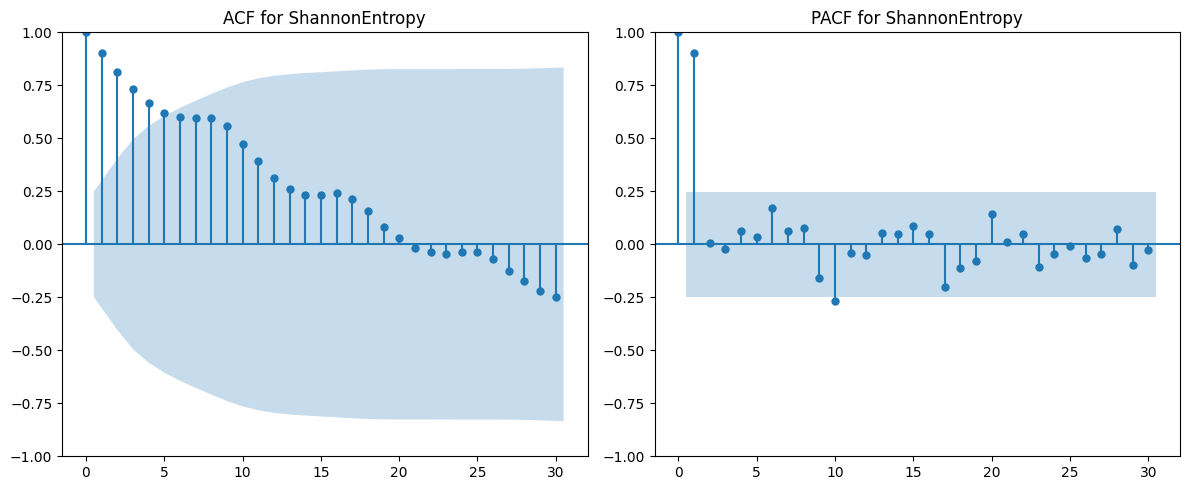

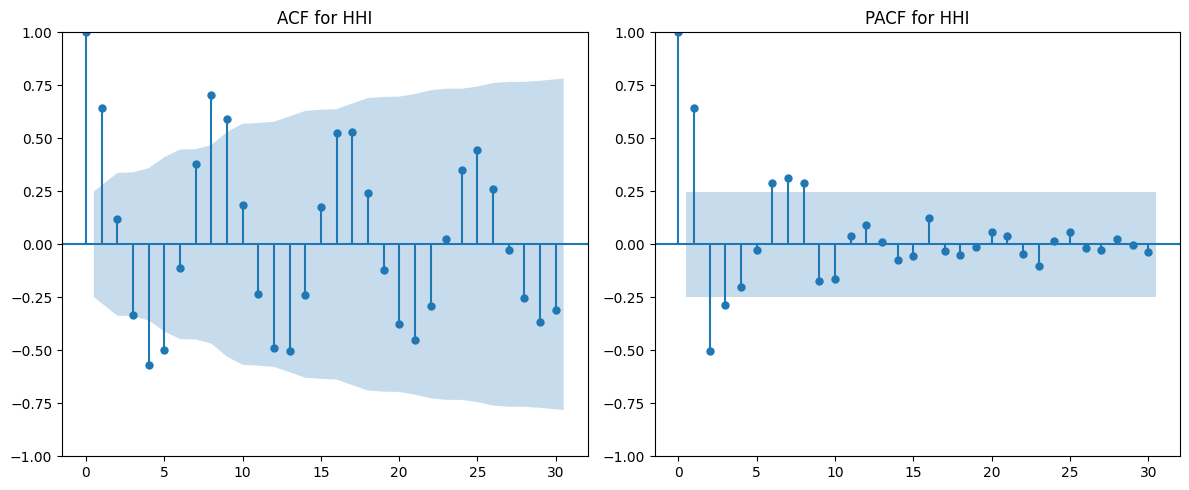

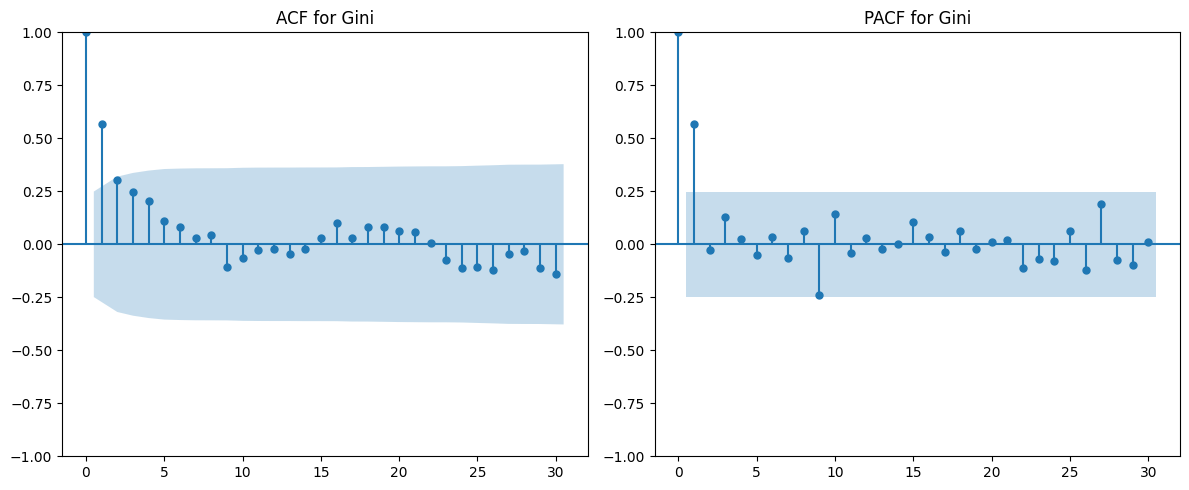

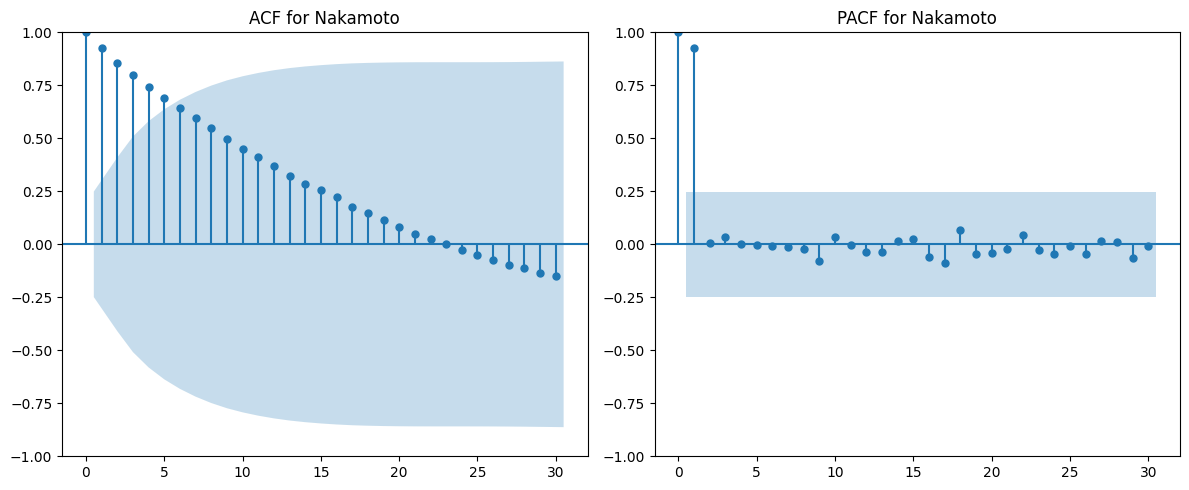

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df=data.copy()
def plot_autocorrelation(df, column_name):
    plt.figure(figsize=(12, 5))
    
    max_lags = len(df) // 2 - 1  # Ensure lags are less than half the sample size
    
    # ACF plot
    plt.subplot(1, 2, 1)
    plot_acf(df[column_name], lags=max_lags, ax=plt.gca())
    plt.title(f'ACF for {column_name}')
    
    # PACF plot
    plt.subplot(1, 2, 2)
    plot_pacf(df[column_name], lags=max_lags, ax=plt.gca())
    plt.title(f'PACF for {column_name}')
    
    plt.tight_layout()

# Save the figure with high resolution
    filename = f"{column_name}_autocorrelation.png"
    plt.savefig(filename, dpi=1800)  # You can adjust the DPI value for desired resolution.
    plt.show()

# For each of your columns
columns_to_test = ["ShannonEntropy", "HHI", "Gini", "Nakamoto"]
for column in columns_to_test:
    plot_autocorrelation(df, column)


> ACF Plot: The autocorrelation function plot gives you the correlation of the series with itself, lagged by x time units. So the y-axis is the correlation and the x-axis is the number of time units of lag.

> PACF Plot: The partial autocorrelation function plot gives the correlation of the series with itself, lagged by x time units, but with the relationships at shorter lags removed.

**Interpreting these plots**:

> Sudden Drop-Off: If either the ACF or PACF shows a sudden drop-off after a certain number of lags, this might indicate that this is the order of the autoregressive term.

> Gradual Decline: If the ACF shows a gradual decline and PACF shows a sudden drop-off, this might indicate that this is the order of the moving average term.

> Significant Spikes: If there are significant spikes at specific lags, this can indicate seasonality in the data.

By analyzing the ACF and PACF plots, you can get insights about potential patterns in your data and inform your choices when building time series models.

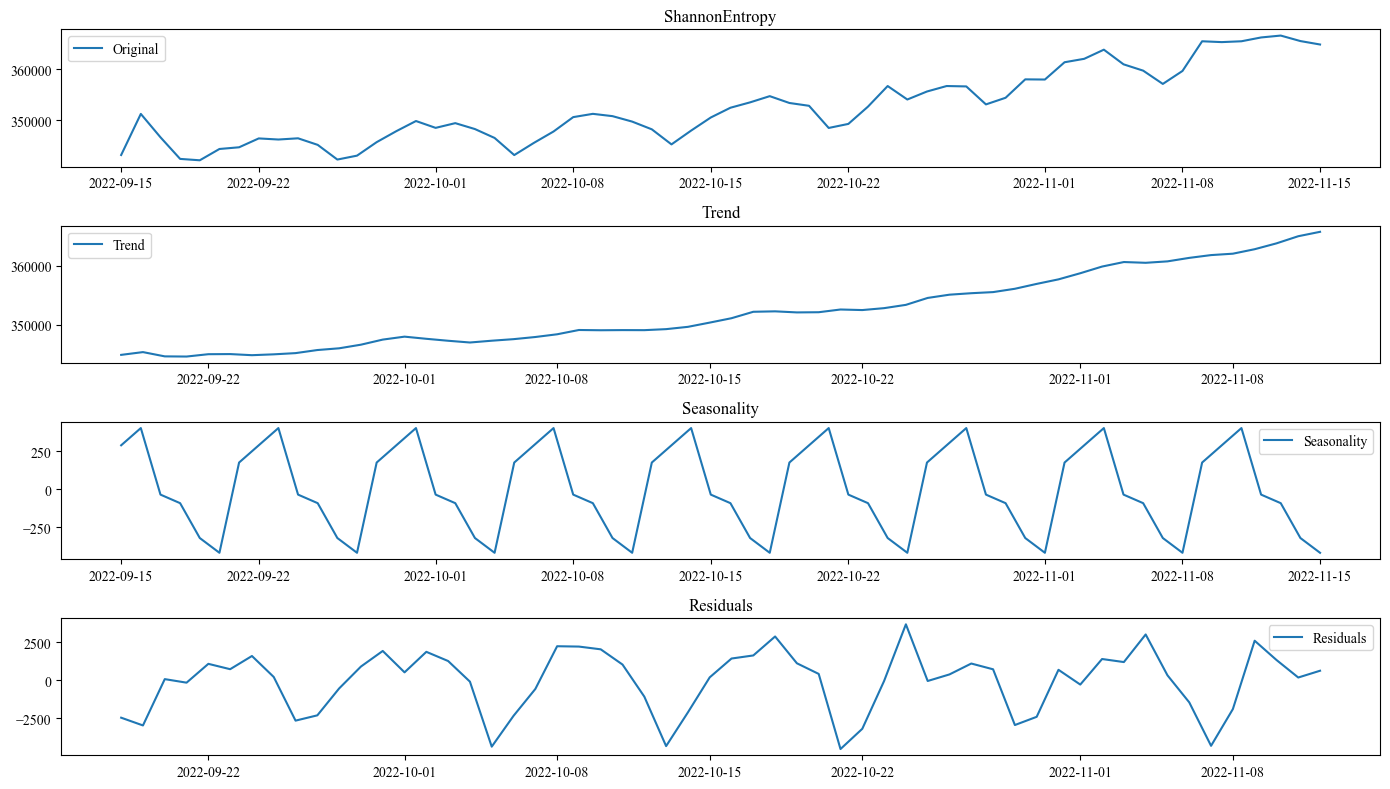

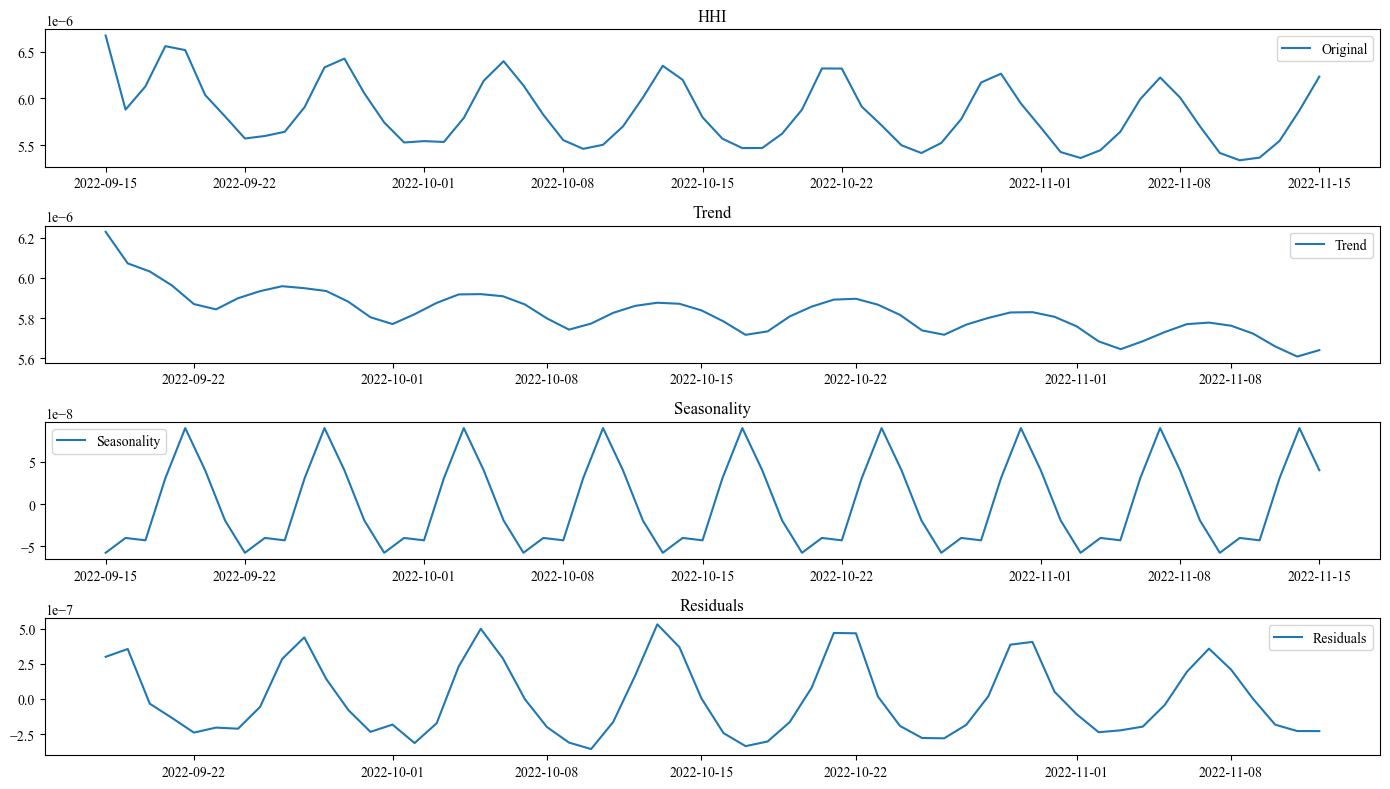

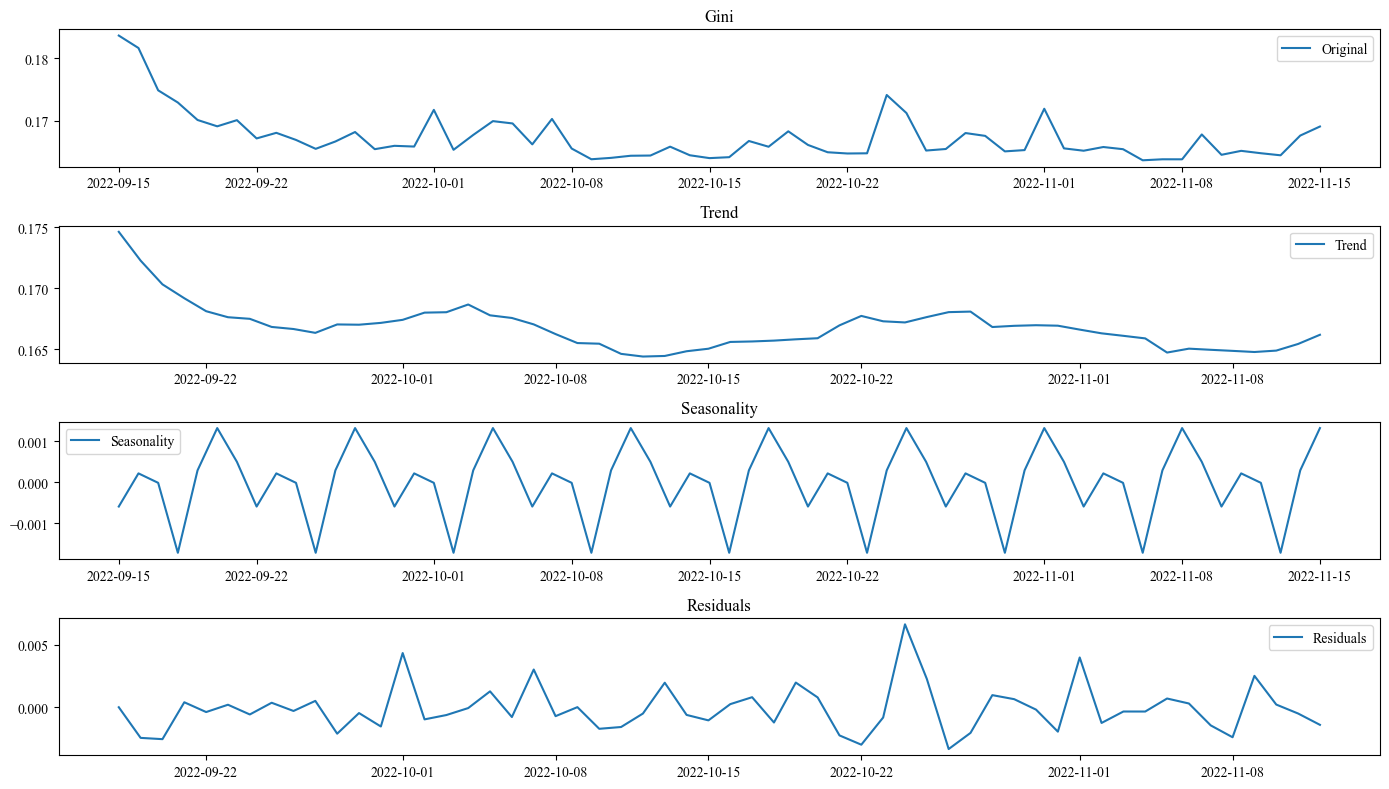

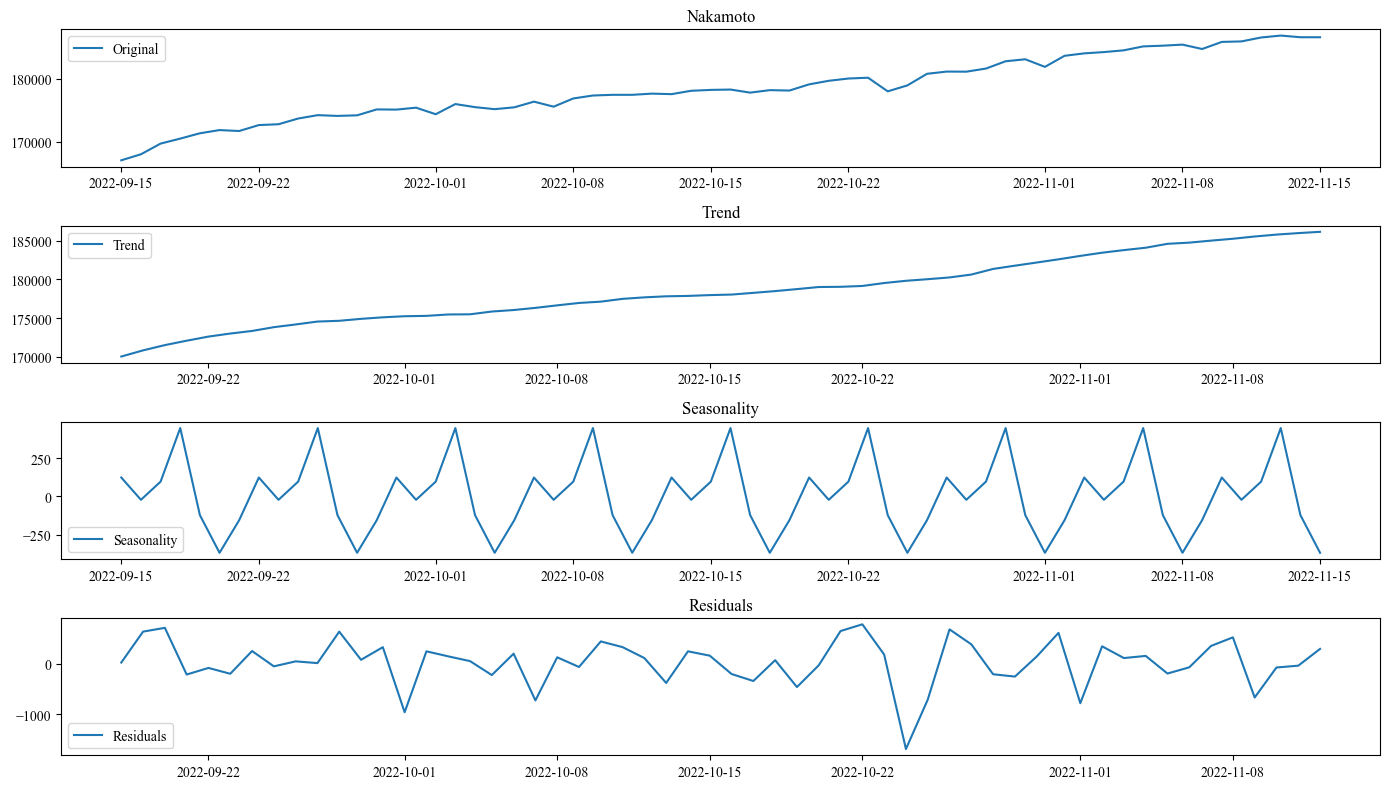

In [136]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Assuming 'data' is your DataFrame
df = data.copy()
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Ensure consistent frequency
if pd.infer_freq(df.index) is not None:
    df = df.asfreq(pd.infer_freq(df.index))
else:
    raise ValueError("Data frequency can't be inferred. Ensure your data has consistent frequency or manually set it.")

# Adjust matplotlib settings
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Define a function to decompose and plot
def plot_decomposition(df, column_name, period=None):
    decomposition = seasonal_decompose(df[column_name], period=period, model='additive')
    
    plt.figure(figsize=(14, 8))
    
    # Original
    plt.subplot(4, 1, 1)
    plt.plot(df[column_name], label='Original')
    plt.legend(loc='best')
    plt.title(column_name)
    
    # Trend
    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='best')
    plt.title("Trend")

    # Seasonal
    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.title("Seasonality")

    # Residuals
    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label='Residuals')
    plt.legend(loc='best')
    plt.title("Residuals")
    
    plt.tight_layout()
    
    # Save the figure to PNG
    plt.savefig(f'{column_name}_decomposition.png', dpi=900)
    plt.show()

# Decompose
# Provided code to set date as index, infer frequency, and plot
columns_to_decompose = ["ShannonEntropy", "HHI", "Gini", "Nakamoto"]
for column in columns_to_decompose:
    plot_decomposition(df, column)


In [34]:
import numpy as np

def detect_seasonality_frequency(ts):
    # Compute the FFT and power spectrum
    fft_vals = np.fft.fft(ts.fillna(0))
    fft_freq = np.fft.fftfreq(len(ts))
    
    # Remove the negative frequencies
    fft_vals = fft_vals[fft_freq > 0]
    fft_freq = fft_freq[fft_freq > 0]
    
    # Find the frequency with the maximum power (excluding the zero frequency)
    dominant_frequency = fft_freq[np.argmax(np.abs(fft_vals)[1:]) + 1]
    
    # Convert frequency to period (seasonality)
    seasonality = int(np.round(1 / dominant_frequency))
    return seasonality

for column in columns_to_decompose:
    seasonality = detect_seasonality_frequency(df[column].dropna())
    print(f"Detected seasonality for {column}: {seasonality} time units")


Detected seasonality for ShannonEntropy: 31 time units
Detected seasonality for HHI: 9 time units
Detected seasonality for Gini: 21 time units
Detected seasonality for Nakamoto: 31 time units


In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import numpy as np

def estimate_growth_rate(df, column_name):
    # Decompose the time series
    decomposition = seasonal_decompose(df[column_name], model='additive')
    
    # Extract trend component
    trend = decomposition.trend.dropna()
    
    # Create a time variable, t
    t = np.arange(len(trend)).reshape(-1, 1)
    
    # Fit linear regression model
    model = LinearRegression().fit(t, trend)
    
    # Return the slope as the growth rate
    return model.coef_[0]

for column in columns_to_decompose:
    growth_rate = estimate_growth_rate(df, column)
    print(f"Estimated growth rate for {column}: {growth_rate:.4f} per time unit")


Estimated growth rate for ShannonEntropy: 367.8186 per time unit
Estimated growth rate for HHI: -0.0000 per time unit
Estimated growth rate for Gini: -0.0001 per time unit
Estimated growth rate for Nakamoto: 261.7281 per time unit


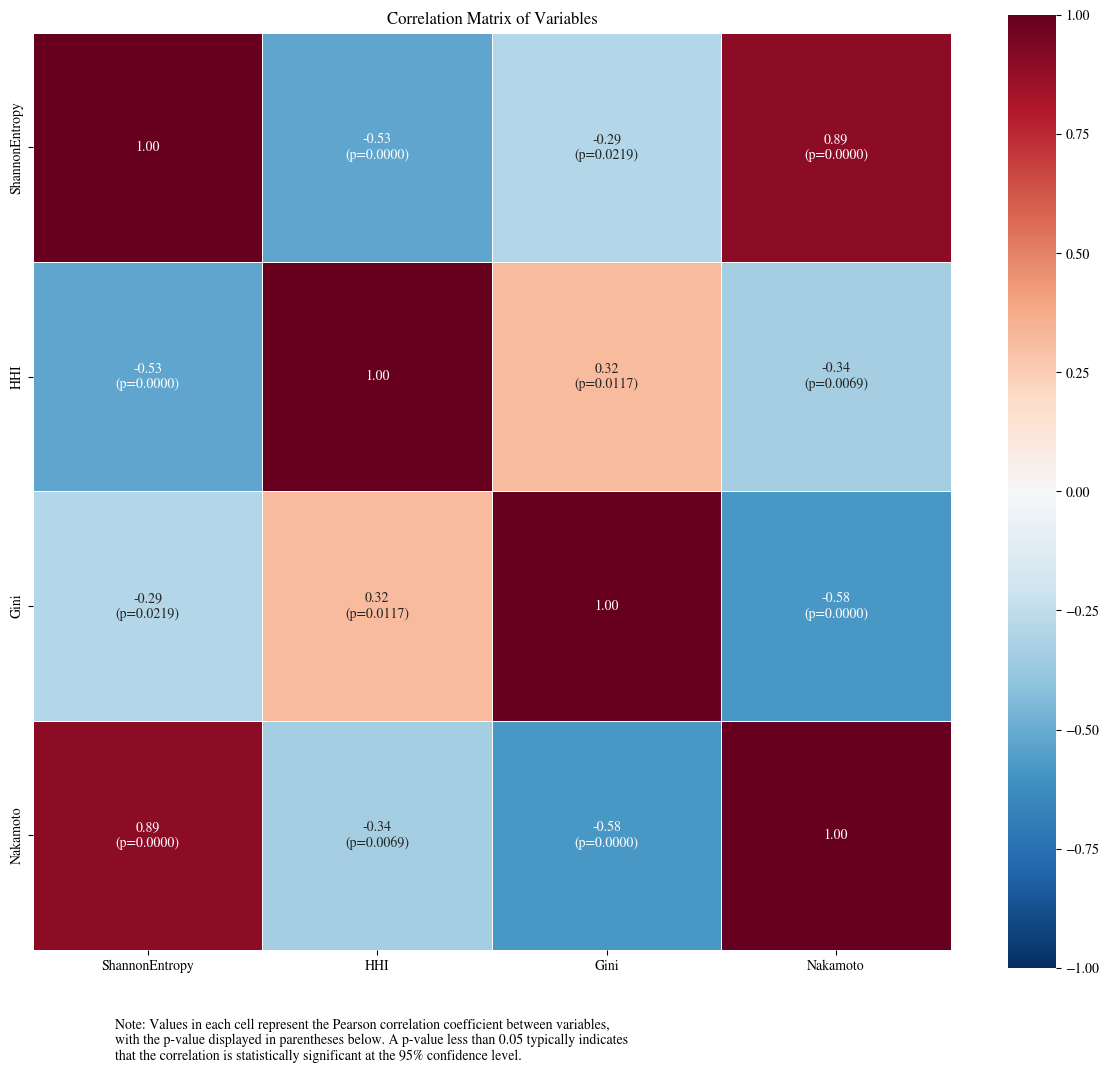

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

df = data.copy()
# Ensure LaTeX is disabled
plt.rcParams['text.usetex'] = False

# Use the 'STIX' fonts for a LaTeX-like appearance without requiring LaTeX
plt.rcParams['font.family'] = 'STIXGeneral'

# Compute the correlation matrix
corr_matrix = df[columns_to_decompose].corr()

# Compute the matrix of p-values
p_matrix = df[columns_to_decompose].corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*corr_matrix.shape)

# Create an array to hold the annotations
annotations = corr_matrix.copy()
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        if i != j:
            annotations.iloc[i, j] = f'{corr_matrix.iloc[i, j]:.2f}\n(p={p_matrix.iloc[i, j]:.4f})'
        else:
            annotations.iloc[i, j] = f'{corr_matrix.iloc[i, j]:.2f}'

# Plot the heatmap with the "RdBu_r" colormap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=annotations, cmap="RdBu_r", vmin=-1, vmax=1, square=True, linewidths=.5, fmt='')
plt.title('Correlation Matrix of Variables')

# Add a figure note
figure_note = """
Note: Values in each cell represent the Pearson correlation coefficient between variables, 
with the p-value displayed in parentheses below. A p-value less than 0.05 typically indicates 
that the correlation is statistically significant at the 95% confidence level.
"""
plt.figtext(0.1, -0.01, figure_note, ha="left", va="top", fontsize=10, wrap=True)

plt.tight_layout()
filename = "index_Correlations.png"
plt.savefig(filename, dpi=900)  # saves with 900 DPI.
plt.show()


# References:
Code adapted from SoK: Blockchain Decentralization: https://arxiv.org/abs/2205.04256